In [2]:
from utils import read_event_file, calculate_reward_thresholds, variance_last_steps
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_names = ['distance_inside_target', 'distance_inside_target_joystick', 'only_distance', 'only_bonus']
reward_names = ["Distance + Inside Target Bonus", "Distance + Inside Target Bonus + Joystick Touch Bonus", "Distance", "Bonus"]
cmap = plt.get_cmap('plasma') 
values = np.linspace(0, len(file_names), len(file_names)) 
colors = {key: cmap(v / 5) for key, v in zip(file_names, values)}
thresholds=[0.2, 0.5, 0.9]
plt.rcParams.update({'font.size': 16})
figsize = (7,5)

In [4]:
rewards = {}
steps = {}
threshold_steps = {}
auc_normalized = {}
variance = {}
i = 0
for f in file_names:
    event_folder = f"../../simulators/mobl_arms_index_remote_driving_{f}"
    steps[f], rewards[f] = read_event_file(event_folder)
    print('---------------------------------------------------------------------')
    print(f"{f}:")
    threshold_steps[f], auc_normalized[f] = calculate_reward_thresholds(steps[f], rewards[f], thresholds)
    variance[f] = variance_last_steps(steps[f], rewards[f]) 
    i += 1

../../simulators/mobl_arms_index_remote_driving_distance_inside_target\PPO_1\events.out.tfevents.1743767935.i8022.2852174.0

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
---------------------------------------------------------------------
distance_inside_target:
Threshold 20% after 960000 steps
Threshold 50% after 1280000 steps
Threshold 90% after 5040000 steps
Area under the curve: 388.5153265007005
126 1.0 0.9169785334034117
Variance from 30M steps on: 0.0002316205551162101
../../simulators/mobl_arms_index_remote_driving_distance_inside_target_joystick\PPO_1\events.out.tfevents.1743768111.i8026.3827885.0
---------------------------------------------------------------------
distance_inside_target_joystick:
Threshold 20% after 880000 steps
Threshold 50% after 1200000 steps
Threshold 90% after 4640000 steps
Area under the curve: 391.1846452338056
126 1.0 0.9235456105524201
Variance from 30M steps on: 0.000250815688181436
../../simulators/mobl_arm

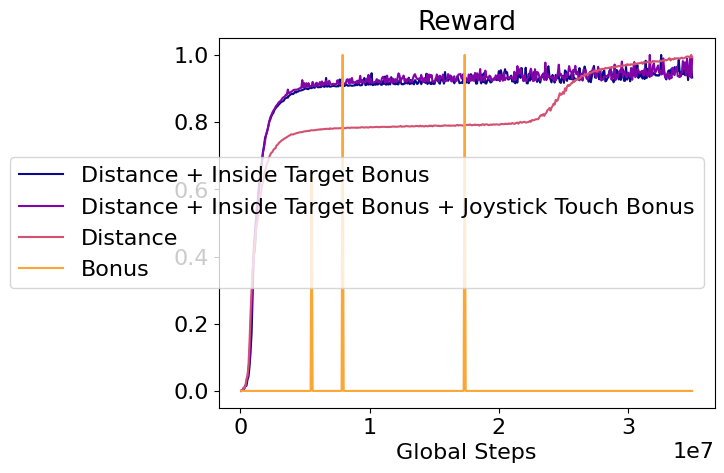

In [5]:
i = 0
for f in file_names:
    plt.plot(steps[f],(np.array(rewards[f]) - min(rewards[f])) / (max(rewards[f]) - min(rewards[f])), color=colors[f], label = reward_names[i])
    i+= 1
plt.title("Reward")
plt.legend()
plt.xlabel("Global Steps")
plt.savefig("reward_plots/remote_control_reward_curve.png")

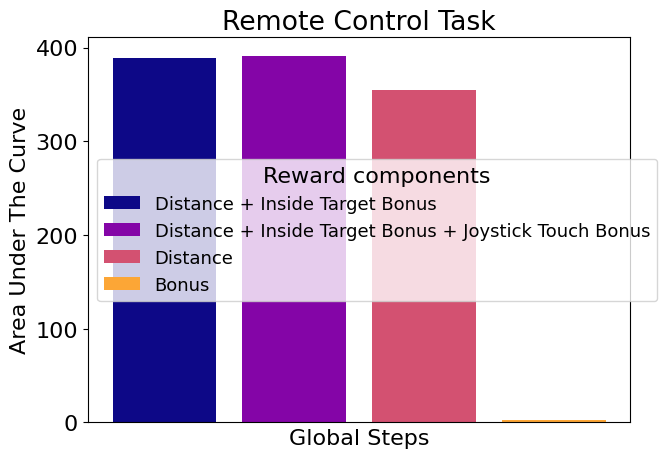

In [12]:
fig, ax = plt.subplots(figsize=figsize)
i = 0
for f in file_names:
    ax.bar(i, auc_normalized[f], color=colors[f], label = reward_names[i])
    i+= 1
plt.title("Remote Control Task")
plt.legend(title="Reward components",loc="center left", fontsize=13)
plt.xticks([])
plt.xlabel("Global Steps")
plt.ylabel("Area Under The Curve")
plt.savefig("reward_plots/remote_control_auc.png")

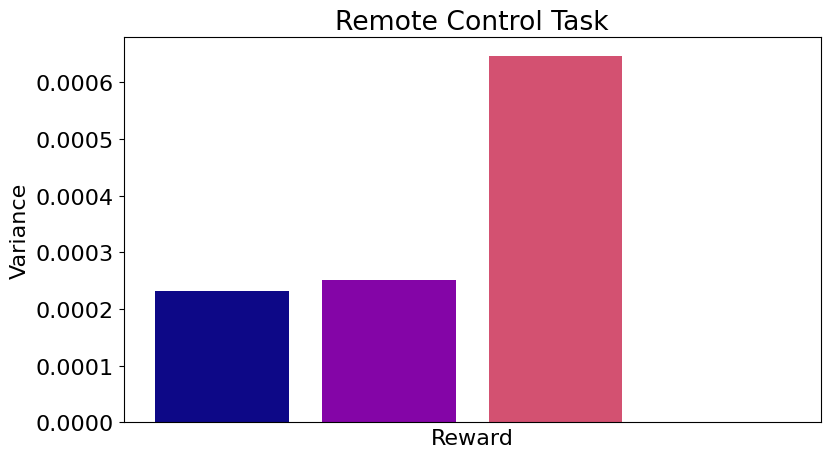

In [9]:
fig, ax = plt.subplots(figsize=(9,5))
i = 0
for f in file_names:
    ax.bar(i, variance[f], color=colors[f], label = reward_names[i])
    i+= 1
plt.title("Remote Control Task")
plt.xticks([])
plt.xlabel("Reward")
plt.ylabel("Variance")
plt.savefig("reward_plots/remote_control_variance.png")

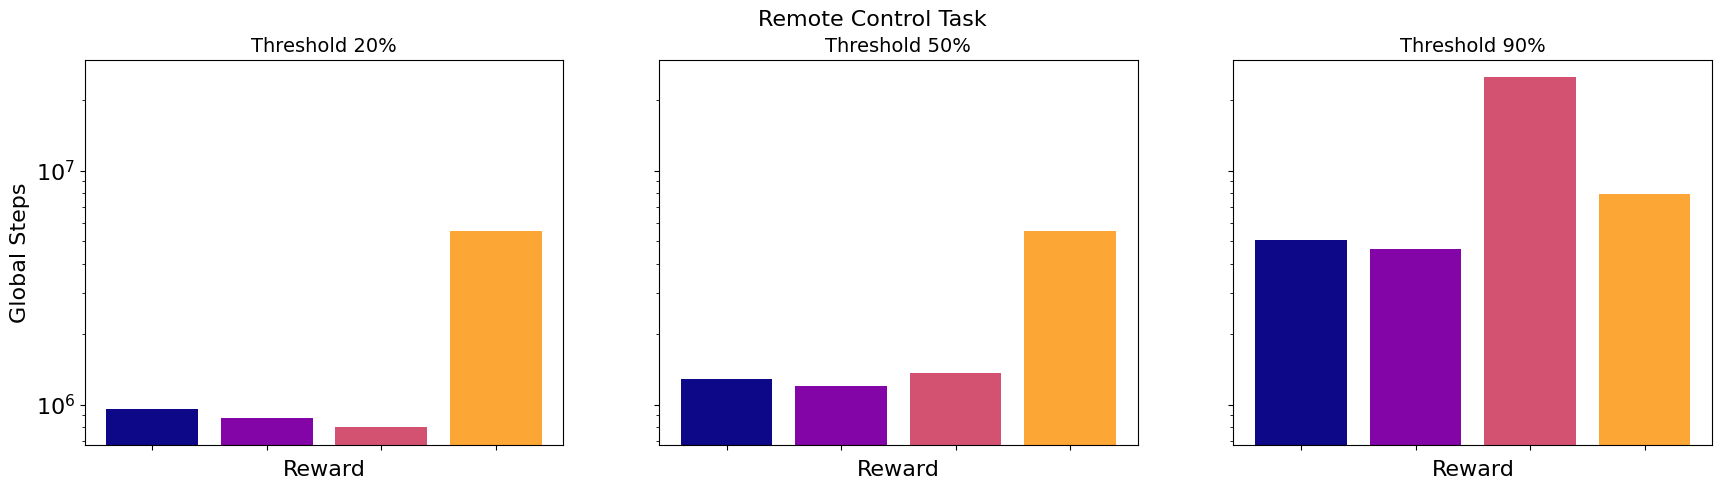

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(21, 5), sharey=True)

for idx, t in enumerate(thresholds):
    ax = axes[idx]
    for i, f in enumerate(file_names):
        ax.bar(i, threshold_steps[f][t], color=colors[f], label=reward_names[i])
    
    ax.set_title(f"Threshold {int(t*100)}%", fontsize=14)
    ax.set_xticks(np.arange(len(file_names)))
    ax.set_xticklabels([])
    ax.set_xlabel("Reward")
    ax.set_yscale('log')
    if idx == 0:
        ax.set_ylabel("Global Steps")

fig.suptitle("Remote Control Task", fontsize=16)
plt.savefig("reward_plots/remote_control_thresholds.png")
plt.show()